# Import Data

In [37]:
import numpy as np
import pandas as pd
import os 
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

# Load Data

In [38]:
labels=[]
data=[]

In [39]:
folder_path= "images"
folders = os.listdir(folder_path)

for folder in folders:
    pathPerFolder=os.path.join(folder_path,folder);
    folderChild= os.listdir(pathPerFolder)
    for file in folderChild:
        img_path=os.path.join(pathPerFolder,file)
        img=cv2.imread(img_path)
        img = cv2.resize(img, (64,64))
        img= img/255.0
        frames=img
        data.append(img)
        labels.append(folder)
        
data=np.array(data,dtype=np.float32)
labels=np.array(labels)
print(f'Data shape: {data.shape}')
print(f'Labels shape: {labels.shape}')

Data shape: (5243, 64, 64, 3)
Labels shape: (5243,)


In [40]:
data[0].shape
sp1,sp2,sp3,sp4=data.shape
sp2
print(sp2*sp3*sp4)

12288


In [41]:
data[0][0][0]

array([0., 0., 0.], dtype=float32)

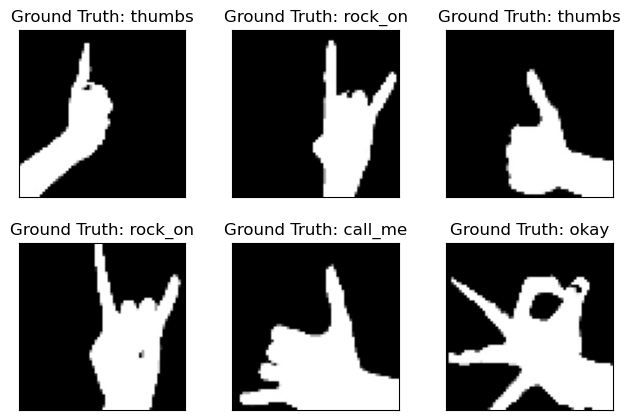

In [70]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  rand_index = np.random.randint(0, data.shape[0])
  plt.imshow(data[rand_index])
  plt.title("Ground Truth: {}".format(labels[rand_index]))
  plt.xticks([])
  plt.yticks([])
fig
plt.show()

In [71]:
np.unique(labels)

array(['call_me', 'fingers_crossed', 'okay', 'paper', 'peace', 'rock',
       'rock_on', 'scissor', 'thumbs', 'up'], dtype='<U15')

In [72]:
#mapping ke int
unique_labels = np.unique(labels)
print(unique_labels)
mapping = {label: i for i, label in enumerate(unique_labels)}
labelsFinal = [mapping[label] for label in labels]

#for i in range(len(labels)):
#    labelsFinal[i]=labelsFinal[i]/10;
    
labelsFinal

['call_me' 'fingers_crossed' 'okay' 'paper' 'peace' 'rock' 'rock_on'
 'scissor' 'thumbs' 'up']


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [73]:
 torch.tensor(labelsFinal).unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
torch.tensor(data)

tensor([[[[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         ...,

         [[1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          [1.0000, 1.0000, 1.0000],
          ...,
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000]],

         [[1.0000, 1.0000, 1.0000],
          [1.0000

# Modeling Data

In [75]:
data_tensor = torch.tensor(data)
labels_tensor = torch.tensor(labelsFinal)

rand_idx = torch.randperm(len(data_tensor))


data_tensor = data_tensor[rand_idx]
labels_tensor = labels_tensor[rand_idx]


x_trains = data_tensor.reshape(-1, sp2*sp3*sp4)
y_trains = labels_tensor


split = int(0.8*len(x_trains))
x_train = x_trains[:split]
y_train = y_trains[:split]
x_testing = x_trains[split:]
y_testing = y_trains[split:]

In [76]:
y_train

tensor([5, 7, 7,  ..., 4, 5, 3])

In [77]:
x_train

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

# Layer

In [102]:
class Layer:
    def __init__(self,weight,bias):
        self.weight=weight;
        self.bias=bias;
    
    def activationSigmoid(self,input) : #Sigmoid
        sigmoid = torch.sigmoid(input)
        return sigmoid
    
    def activationRelu(self,input) : #ReLu
        m = nn.ReLU()
        return m(input)
    
    def activationSM(self,input) : #SoftMax
        #A = torch.exp(input) / torch.sum(torch.exp(input))
        #return A
        m = nn.Softmax(dim=1)
        return m(input)
   
    def dSigmoid(self,input):
        sigmoid=torch.sigmoid(input)
        return sigmoid * (1-sigmoid)
    
    def dRelu(self,input):
        return torch.where(input>0,1.0,0.0)
    
    def dSoftMax(self,input):
        sm=torch.softmax(input,dim=1)
        return sm * (1-sm)
        
    def forward1(self, input) :
         input = input.float()
         output = (torch.matmul(input, self.weight)) + self.bias
         return output, self.activationRelu(output)
       
    def forward2(self, input) :
        output=(torch.matmul(input,self.weight))+self.bias
        return output,self.activationSigmoid(output)
    
    def forward3(self, input) :
        output=(torch.matmul(input, self.weight)) + self.bias
        return output, self.activationSM(output)
        #return output, output

# Network

In [79]:
class Network:
    def __init__(self,w1,b1,w2,b2,w3,b3,batch_size=10):
        self.batch_size=batch_size;
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.layer1=Layer(self.w1,self.b1)
        self.layer2=Layer(self.w2,self.b2)
        self.layer3=Layer(self.w3,self.b3)
        
    def forward1(self,x):
        pred,a=self.layer1.forward1(x)
        return pred,a
    
    def forward2(self,x):
        pred,a=self.layer2.forward2(x)
        return pred,a
    
    def forward3(self,x):
        pred,a=self.layer3.forward3(x)
        return pred,a
    
    def backPropLayer3(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y,m):
        dZ3=A3-Y;
        dW = (1/m) * A2.T @ dZ3
        dB = (1/m) * torch.sum(dZ3, dim=0)
        return self.backPropLayer2(dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW,dB);
        
    def backPropLayer2(self,dZ3,A1,Z1, A2,Z2,W1,W2,W3,X, Y,m,dW3,db3):
        dZ2 = (dZ3.float() @ W3.T.float()) * self.layer2.dSigmoid(Z2.float())
        dW = (1/m) * A1.T.float() @ dZ2.float()
        db = 1 / m * torch.sum(dZ2)
        return self.backPropLayer1(dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW,db)
        
    def backPropLayer1(self,dZ2,dZ3,A1,Z1, A2,Z2,W1,W2,X, Y,m,dW3,db3,dW2,db2):
        dZ1 = (dZ2.float()@W2.T.float()) * self.layer1.dRelu(Z1.float())
        dW = (1/m) * X.T.float() @ dZ1.float()
        db = 1 / m * torch.sum(dZ1)
        return dW, db, dW2, db2, dW3, db3
    
    def single_processing(self,input):
        pred1,error1=self.forward1(input)
        pred2,error2=self.forward2(error1)
        pred3,error3=self.forward3(error2)
        return pred1,error1,pred2,error2,pred3,error3
    
    def batch_processing(self,input,target):
        for i in range(0,len(input)-1,self.batch_size):
            new_len = [input[j].tolist() for j in range(i, i+self.batch_size)]
            new_ten=torch.Tensor(new_len)
            new_tar = [target[j].tolist() for j in range(i, i+self.batch_size)]
            new_tar2=torch.Tensor(new_tar)
            self.single_processing(new_ten,new_tar2)

# Training

In [115]:
class Training:
    def __init__(self,x_train,y_train,seed=52,learning_rate=0.5,epoch=2000,stop=8):
        self.seed=seed
        torch.manual_seed(self.seed)
        randData=torch.randperm(len(x_train))
        self.x_train=x_train[randData];
        self.y_train=y_train[randData];
        self.m=x_train.shape[1]
        self.learning_rate=learning_rate;
        self.w1=torch.randn((self.m,512), dtype=torch.float32) * np.sqrt(1./(512))
        self.b1=torch.randn((512), dtype=torch.float32) * np.sqrt(1./(512))
        self.w2=torch.randn((512,64), dtype=torch.float32) * np.sqrt(1./(64))
        self.b2=torch.randn((64), dtype=torch.float32) * np.sqrt(1./(64))
        self.w3=torch.randn((64,10), dtype=torch.float32) * np.sqrt(1./(10))
        self.b3=torch.randn((10), dtype=torch.float32) * np.sqrt(1./(10))
        self.epoch=epoch
        self.learning_rate=learning_rate
        self.stop=stop
        self.model=Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
   
    def convertY(self,Y):
         Y_res = torch.zeros((len(Y), 10))
         Y_res[torch.arange(len(Y)), Y.long()] = 1
         return Y_res
        
    def forward_prop(self,w1,b1,w2,b2,w3,b3,X):
        pred1,error1,pred2,error2,pred3,error3=self.model.single_processing(X)
        return pred1.double(), error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def backward_prop(self,Z1, A1, Z2, A2, A3,W1,W2,W3, X, Y):
        dW, db, dW2, db2, dW3, db3=self.model.backPropLayer3(Z1, A1, Z2, A2, A3,self.w1,self.w2,self.w3, self.x_train, self.convertY(self.y_train),self.m)
        return torch.tensor(dW), torch.tensor(db), torch.tensor(dW2), torch.tensor(db2),torch.tensor(dW3), torch.tensor(db3)
    
    def update_params(self, dW1, db1, dW2, db2, dW3, db3):
        self.w1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.w2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.w3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
    
    def get_predictions(self,A):
        #print(torch.argmax(A, dim=1))
        return torch.argmax(A, 0)
        #A_sm = torch.softmax(A, dim=0)  # baru softmax di sini
        #return torch.argmax(A_sm, dim=0)

    def get_accuracy(self,predictions, Y):
        return torch.sum(predictions == Y) / self.m
    
    def trainingData(self):
        verge=0;
        treshold=0;
        for i in range(self.epoch):
            Z1,A1,Z2,A2,Z3,A3= self.forward_prop(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3,self.x_train)
            #LR Rescheduling
            lr=self.learning_rate*(0.95**(i//100))
            dW1, db1, dW2, db2,dW3,db3 = self.backward_prop(Z1, A1, Z2, A2, A3, self.w1,self.w2,self.w3,self.x_train, self.y_train)
            self.update_params(dW1, db1, dW2, db2, dW3, db3)
            print(f"Iteration {i}")
            predictions=self.get_predictions(A3.T) 
            #print(f"Iter {i} dan W1 max: {self.w1.max():.4f}, min: {self.w1.min():.4f}")
            #print(f"Iter {i} dam A3 max: {A3.max():.4f}, min: {A3.min():.4f}, sum: {A3.sum()}")
            #print(f"Iter {i} dan Predictions unique: {predictions.unique(return_counts=True)}")
            #print(f"Coba :{A3.T} dan predict : {predictions.unique()}")
            print(f"Prediction: {predictions}, Label : {self.y_train}")
            acc=self.get_accuracy(predictions,self.y_train)
            print(f"accuracy : {acc*100}%")
            if(verge>acc and (acc*100)>80):
                treshold+=1
            else:
                verge=acc
                treshold=0
            if(treshold>=self.stop):
                return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3
        return self.w1,self.b1,self.w2,self.b2,self.w3,self.b3 
            

# Validation

In [81]:
class Validation:
    def __init__(self,w1,b1,w2,b2,w3,b3,index):
        self.w1=w1
        self.b1=b1
        self.w2=w2
        self.b2=b2
        self.w3=w3
        self.b3=b3
        self.index=index
        
    def predict(self,X):
        Z1,A1,Z2,A2,Z3,A3=self.forwardValid(X)
        prediction=self.get_prediction_validation(A3)
        return prediction
    
    def forwardValid(self,X):
        model= Network(self.w1,self.b1,self.w2,self.b2,self.w3,self.b3)
        pred1,error1,pred2,error2,pred3,error3=model.single_processing(X)
        return pred1.double(), error1.double(), pred2.double(), error2.double(), pred3.double(), error3.double()
    
    def get_prediction_validation(self,A):
        return torch.argmax(A, 0)
            
    def ValidationMain(self):
        imageValid=x_testing[index,:,None]
        prediction=self.predict(X)
        label=y_testing[index]
        print(f"Hasil : {prediction}, Data Asli : {label}")

# Start!

In [82]:
y_train
x_train
print(y_train)
print(type(y_train))
print(type(x_train))
x_train.shape
y_train.shape

tensor([5, 7, 7,  ..., 4, 5, 3])
<class 'torch.Tensor'>
<class 'torch.Tensor'>


torch.Size([4194])

In [83]:
print(x_train.shape)
x_train[0]

torch.Size([4194, 12288])


tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [84]:
y_train.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
x_train.unique()

tensor([0.0000, 0.0039, 0.0078, 0.0118, 0.0157, 0.0196, 0.0235, 0.0275, 0.0314,
        0.0353, 0.0392, 0.0431, 0.0471, 0.0510, 0.0549, 0.0588, 0.0627, 0.0667,
        0.0706, 0.0745, 0.0784, 0.0824, 0.0863, 0.0902, 0.0941, 0.0980, 0.1020,
        0.1059, 0.1098, 0.1137, 0.1176, 0.1216, 0.1255, 0.1294, 0.1333, 0.1373,
        0.1412, 0.1451, 0.1490, 0.1529, 0.1569, 0.1608, 0.1647, 0.1686, 0.1725,
        0.1765, 0.1804, 0.1843, 0.1882, 0.1922, 0.1961, 0.2000, 0.2039, 0.2078,
        0.2118, 0.2157, 0.2196, 0.2235, 0.2275, 0.2314, 0.2353, 0.2392, 0.2431,
        0.2471, 0.2510, 0.2549, 0.2588, 0.2627, 0.2667, 0.2706, 0.2745, 0.2784,
        0.2824, 0.2863, 0.2902, 0.2941, 0.2980, 0.3020, 0.3059, 0.3098, 0.3137,
        0.3176, 0.3216, 0.3255, 0.3294, 0.3333, 0.3373, 0.3412, 0.3451, 0.3490,
        0.3529, 0.3569, 0.3608, 0.3647, 0.3686, 0.3725, 0.3765, 0.3804, 0.3843,
        0.3882, 0.3922, 0.3961, 0.4000, 0.4039, 0.4078, 0.4118, 0.4157, 0.4196,
        0.4235, 0.4275, 0.4314, 0.4353, 

In [116]:
train = Training(x_train,y_train)
w1,b1,w2,b2,w3,b3=train.trainingData()
w1,b1,w2,b2,w3,b3

Iteration 0
Prediction: tensor([0, 0, 0,  ..., 0, 3, 3]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 3.3528645038604736%
Iteration 1
Prediction: tensor([1, 5, 7,  ..., 5, 5, 7]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 3.8818359375%
Iteration 2
Prediction: tensor([8, 6, 1,  ..., 6, 2, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 5.2571611404418945%
Iteration 3
Prediction: tensor([8, 8, 1,  ..., 8, 9, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 7.12890625%
Iteration 4
Prediction: tensor([8, 6, 1,  ..., 6, 2, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 7.771810054779053%
Iteration 5
Prediction: tensor([8, 8, 1,  ..., 8, 9, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 9.285482406616211%
Iteration 6
Prediction: tensor([8, 6, 1,  ..., 6, 6, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 6.778971195220947%
Iteration 7
Prediction: tensor([8, 7, 7,  ..., 7, 7, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy

Iteration 64
Prediction: tensor([1, 8, 7,  ..., 6, 9, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 22.412109375%
Iteration 65
Prediction: tensor([1, 8, 1,  ..., 2, 5, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 22.859699249267578%
Iteration 66
Prediction: tensor([1, 8, 7,  ..., 6, 6, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 24.267578125%
Iteration 67
Prediction: tensor([1, 8, 1,  ..., 4, 5, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 22.770183563232422%
Iteration 68
Prediction: tensor([1, 0, 9,  ..., 6, 9, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 21.525066375732422%
Iteration 69
Prediction: tensor([1, 8, 7,  ..., 7, 4, 8]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 19.197589874267578%
Iteration 70
Prediction: tensor([1, 0, 1,  ..., 6, 6, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 20.515949249267578%
Iteration 71
Prediction: tensor([1, 8, 7,  ..., 4, 4, 8]), Label : tensor([1, 8, 4,  ..., 4, 4,

Iteration 128
Prediction: tensor([1, 8, 7,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.6376953125%
Iteration 129
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.11686134338379%
Iteration 130
Prediction: tensor([1, 8, 7,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.84928321838379%
Iteration 131
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.49934959411621%
Iteration 132
Prediction: tensor([1, 8, 7,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.77604103088379%
Iteration 133
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.36100196838379%
Iteration 134
Prediction: tensor([1, 8, 7,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 28.32845115661621%
Iteration 135
Prediction: tensor([1, 8, 1,  ..., 6, 6, 2]), Label : tensor([1, 8, 4,  .

Iteration 192
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 30.31412696838379%
Iteration 193
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 30.43619728088379%
Iteration 194
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 30.67220115661621%
Iteration 195
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 30.59895896911621%
Iteration 196
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 31.09537696838379%
Iteration 197
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 30.98958396911621%
Iteration 198
Prediction: tensor([1, 8, 1,  ..., 6, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 31.63248634338379%
Iteration 199
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4

Iteration 256
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.121742248535156%
Iteration 257
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.211265563964844%
Iteration 258
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.138023376464844%
Iteration 259
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.251953125%
Iteration 260
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.113609313964844%
Iteration 261
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.251953125%
Iteration 262
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.138023376464844%
Iteration 263
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..

Iteration 320
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.797203063964844%
Iteration 321
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.8134765625%
Iteration 322
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.821617126464844%
Iteration 323
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.821617126464844%
Iteration 324
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.821617126464844%
Iteration 325
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.846031188964844%
Iteration 326
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.846031188964844%
Iteration 327
Prediction: tensor([1, 8, 1,  ..., 4, 4, 2]), Label : tensor([1, 8,

Iteration 384
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.984375%
Iteration 385
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.984375%
Iteration 386
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.984375%
Iteration 387
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.992515563964844%
Iteration 388
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 33.984375%
Iteration 389
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.000648498535156%
Iteration 390
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.000648498535156%
Iteration 391
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 

Iteration 449
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 450
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 451
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 452
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 453
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 454
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 455
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.065757751464844%
Iteration 456
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([

Iteration 512
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.090171813964844%
Iteration 513
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.090171813964844%
Iteration 514
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.098304748535156%
Iteration 515
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.098304748535156%
Iteration 516
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.098304748535156%
Iteration 517
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.098304748535156%
Iteration 518
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.098304748535156%
Iteration 519
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([

Iteration 576
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 577
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 578
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 579
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 580
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 581
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 582
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 583
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130

Iteration 642
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 643
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 644
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 645
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 646
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 647
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 648
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 649
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130

Iteration 708
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 709
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 710
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 711
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 712
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 713
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 714
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130859375%
Iteration 715
Prediction: tensor([1, 8, 4,  ..., 4, 4, 2]), Label : tensor([1, 8, 4,  ..., 4, 4, 2])
accuracy : 34.130

KeyboardInterrupt: 